In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
#pima indians data

df = pd.read_csv('diabetes.csv')

In [3]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
# 데이터 확인 NaN, 결측치를 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 데이터 확인 결과 비율을 확인한다.
df.Outcome.value_counts()
# 비율이 비슷하지 않다 -> 비율을 적절히 학습하도혹 해야한다.

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# 데이터와 결과를 분리한다.
X = df.drop(columns = 'Outcome')
# X = df.iloc[:,:-1]
y = df.Outcome

In [7]:
# 데이터를 학습용, 테스트용 으로 나눈다.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156, stratify=y)

# 모델을 설정한다.
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train,y_train)

# 예측 결과를 낸다.
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

# predict_proba 0,1 확률 쌍

In [8]:
# 모델 확인용 데이터를 확인하다.

def get_clf_eval(y_test,pred,pred_proba_1):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    #정확도
    precision = precision_score(y_test,pred)
    #정밀도
    recall = recall_score(y_test,pred)
    #재현율
    f1= f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba_1)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')
    
def precision_recall_curve_plot(y_test, pred_proba_1) :
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

    # 개수가 다르기 때문에
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
get_clf_eval(y_test,pred,pred_proba)
#재현율이 낮다

오차행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 : 0.6465, AUC : 0.8083


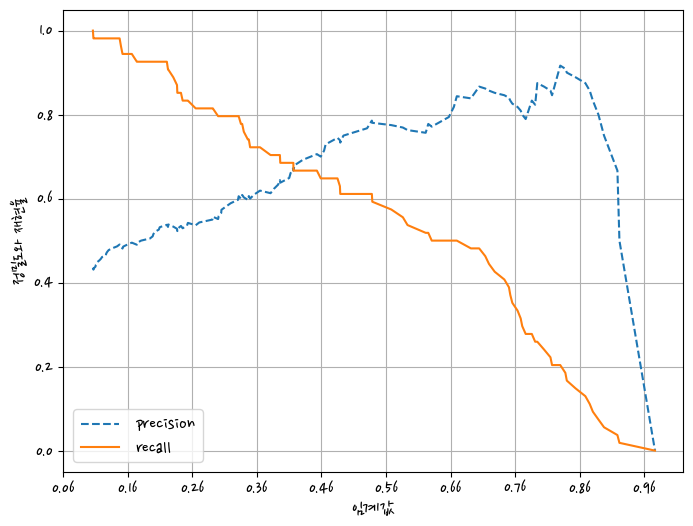

In [54]:
precision_recall_curve_plot(y_test, pred_proba)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# 이상 데이터를 확인한다.

df.describe()
# min 값 0이다. -> 이상한 값이 있음을 볼 수 있다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

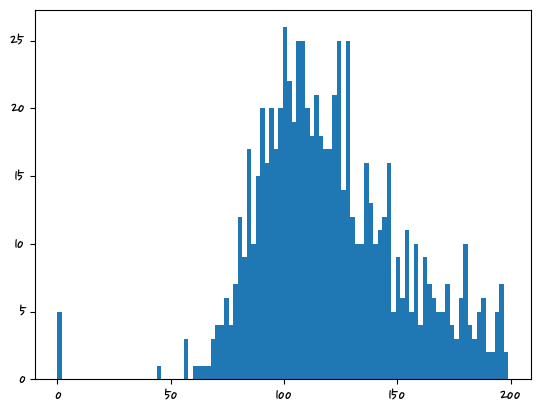

In [13]:
# 이상 데이터를 그래프로 확인한다.

plt.hist(df['Glucose'],bins=100)
# bins 구간을 100으로

(array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  4.,  2.,  0.,
         5., 13.,  0., 11.,  0., 11., 14.,  0., 21.,  0., 37., 35.,  0.,
        43.,  7., 30., 45.,  0., 57.,  0., 44., 52.,  8., 39., 45.,  0.,
        40.,  0., 30., 23.,  6., 21.,  0., 25., 22.,  0.,  8.,  0.,  7.,
         4.,  0.,  3.,  3.,  0.,  1.,  0.,  2.,  3.,  0.,  2.,  0.,  3.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   1.22,   2.44,   3.66,   4.88,   6.1 ,   7.32,   8.54,
          9.76,  10.98,  12.2 ,  13.42,  14.64,  15.86,  17.08,  18.3 ,
         19.52,  20.74,  21.96,  23.18,  24.4 ,  25.62,  26.84,  28.06,
         29.28,  30.5 ,  31.72,  32.94,  34.16,  35.38,  36.6 ,  37.82,
         39.04,  40.26,  41.48,  42.7 ,  43.92,  45.14,  46.36,  47.58,
         48.8 ,  50.02,  51.24,  52.46,  53.68,  54.9 ,  56.12,  57.34,
  

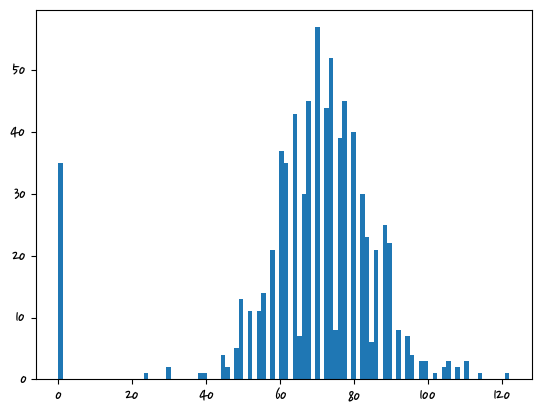

In [14]:
plt.hist(df['BloodPressure'],bins=100)

(array([227.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   0.,   5.,
          6.,   7.,  11.,   6.,  14.,   6.,  14.,  20.,  18.,  13.,  10.,
         16.,  22.,  12.,  16.,  16.,  23.,  20.,  17.,  27.,  19.,  31.,
         20.,   8.,  15.,  14.,  16.,   7.,  18.,  16.,  15.,  11.,   6.,
          5.,   6.,   8.,   4.,   4.,   3.,   3.,   1.,   2.,   0.,   2.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 10.89, 11.88, 12.87, 13.86, 14.85, 15.84, 16.83,
        17.82, 18.81, 19.8 , 20.79, 21.78, 22.77, 23.76, 24.75, 25.74,
        26.73, 27.72, 28.71, 29.7 , 30.69, 31.68, 32.67, 33.66, 34.65,
        35.64, 36.63, 37.62, 38.61

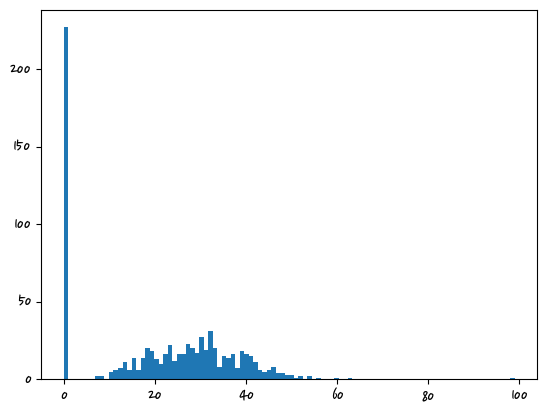

In [15]:
plt.hist(df['SkinThickness'],bins=100)

(array([374.,   3.,   6.,   2.,  10.,  19.,  20.,  18.,  21.,  14.,  18.,
         20.,  15.,  17.,  18.,  20.,  10.,  12.,  14.,  11.,   9.,  15.,
         12.,   5.,  10.,   3.,   5.,   5.,   4.,   2.,   2.,   3.,   6.,
          4.,   3.,   2.,   1.,   2.,   5.,   2.,   1.,   0.,   1.,   1.,
          1.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          0.,   4.,   1.,   2.,   0.,   1.,   0.,   0.,   1.,   2.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   8.46,  16.92,  25.38,  33.84,  42.3 ,  50.76,  59.22,
         67.68,  76.14,  84.6 ,  93.06, 101.52, 109.98, 118.44, 126.9 ,
        135.36, 143.82, 152.28, 160.74, 169.2 , 177.66, 186.12, 194.58,
        203.04, 211.5 , 219.96, 228.42, 236.88, 245.34, 253.8 , 262.26,
        270.72, 279.18, 287.64

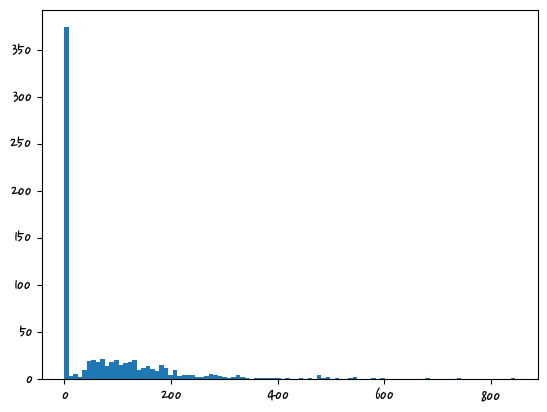

In [16]:
plt.hist(df['Insulin'],bins=100)

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  4.,  3.,  8.,  4.,  7., 11., 11., 14., 17., 26., 22., 24.,
        20., 22., 26., 24., 22., 36., 26., 21., 29., 32., 30., 38., 26.,
        30., 22., 24., 13., 24., 15., 21., 11., 11.,  7.,  5., 14., 13.,
         5.,  3.,  9.,  6.,  5.,  0.,  3.,  1.,  2.,  2.,  0.,  0.,  2.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.   ,  0.671,  1.342,  2.013,  2.684,  3.355,  4.026,  4.697,
         5.368,  6.039,  6.71 ,  7.381,  8.052,  8.723,  9.394, 10.065,
        10.736, 11.407, 12.078, 12.749, 13.42 , 14.091, 14.762, 15.433,
        16.104, 16.775, 17.446, 18.117, 18.788, 19.459, 20.13 , 20.801,
        21.472, 22.143, 22.814, 23.485, 24.156, 24.827, 25.498, 26.169,
        26.84 , 27.511, 28.182, 28.853, 29.524, 30.195, 30.866, 31.537,
  

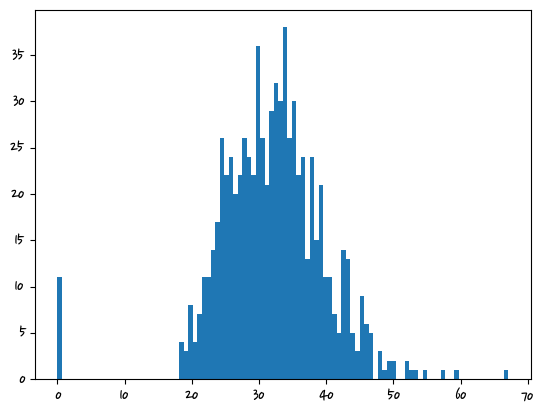

In [17]:
plt.hist(df['BMI'],bins=100)

In [18]:
# 이상치 확인(통계)

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0의 건수는 {zero_count}건 퍼센트 {100*zero_count/total_count}%')

Glucose컬럼의 0의 건수는 5건 퍼센트 0.6510416666666666%
BloodPressure컬럼의 0의 건수는 35건 퍼센트 4.557291666666667%
SkinThickness컬럼의 0의 건수는 227건 퍼센트 29.557291666666668%
Insulin컬럼의 0의 건수는 374건 퍼센트 48.697916666666664%
BMI컬럼의 0의 건수는 11건 퍼센트 1.4322916666666667%


In [19]:
df[zero_features].mean()
# 0이 포함되 평균이 구햐지지 않는가?
# 수업 용이라서 그렇겠지요?

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [20]:
# 이상치를 처리한다.
mean_zero_features = df[zero_features].mean()

In [48]:
df[zero_features] = df[zero_features].replace(0,mean_zero_features)

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
X = df.drop(columns = 'Outcome')
y = df.Outcome
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,t_test = train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)
lr_clf =LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

# 오차행렬
# [[87 13]
#  [22 32]]
# 정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 : 0.6465, AUC : 0.8083


오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


In [52]:
# 케이스에 맞게 함수를 변경

thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
def get_eval_by_threshold(y_test,pred, pred_proba_1,thresholds):
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds :
        custom_predict= binarizer = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict,pred_proba_1)
        
get_eval_by_threshold(y_test,pred,pred_proba.reshape(-1,1),thresholds)

임계값 : 0.3
오차행렬
[[65 35]
 [11 43]]
정확도 : 0.7013, 정밀도 : 0.5513, 재현율 : 0.7963, F1 : 0.6515, AUC : 0.8433
임계값 : 0.33
오차행렬
[[71 29]
 [11 43]]
정확도 : 0.7403, 정밀도 : 0.5972, 재현율 : 0.7963, F1 : 0.6825, AUC : 0.8433
임계값 : 0.36
오차행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222, F1 : 0.6667, AUC : 0.8433
임계값 : 0.39
오차행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037, F1 : 0.6667, AUC : 0.8433
임계값 : 0.42
오차행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667, F1 : 0.6792, AUC : 0.8433
임계값 : 0.45
오차행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667, F1 : 0.6857, AUC : 0.8433
임계값 : 0.48
오차행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8433
임계값 : 0.5
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


In [53]:
#  